In [1]:
%matplotlib inline
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
# Read digit images: 65,000X28x28 grey images (binary data)
digits = np.fromfile('X.bin', dtype=np.single)

# Read digit image labels: 65,000X10 (one-hot vector)
labels = np.fromfile('Y.bin', dtype=np.single)

In [3]:
digits.shape, labels.shape

((50960000,), (650000,))

In [4]:
digits = digits.reshape (65000, 28, 28)
labels = labels.reshape (65000, 10)

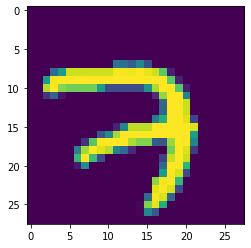

In [5]:
plt.imshow(digits[0])

In [6]:
# function to convert one-hot vector to (unint8) digit; assuming is 10-element vectors 
def oneHotVector_2_digit(v):
    index = 0
    max = v[0]
    for i in range(1, 10):
        if v[i] > max:
            max = v[i]
            index = i
    return index

In [7]:
# test the function, oneHotVector_2_digit
x = np.zeros(10)
x[8] = 1
oneHotVector_2_digit(x), oneHotVector_2_digit(labels[0,])

(8, 7)

In [8]:
# Convert (one-hot-vector) labels to unsiged_8
digLabel = np.zeros (65000, dtype = np.uint8)
for i in range(labels.shape[0]):
    digLabel[i] = oneHotVector_2_digit(labels[i,])

In [9]:
digLabel[0], digLabel[100]

(7, 7)

In [10]:
# save digLabel to a file of .npy narray format
np.save ("digit_image_labels", digLabel) # saved to .npy format

In [11]:
# test the saved .npy file
digit_label = np.load("digit_image_labels.npy") 
digit_label.shape, type(digit_label)

((65000,), numpy.ndarray)

In [12]:
# save digLabel to a binary file
digLabel.tofile ("digit_image_labels.bin") # default to binary

In [13]:
# test the saved .bin file
digit_label = np.fromfile("digit_image_labels.bin", dtype = np.uint8) 
digit_label.shape, type(digit_label)

((65000,), numpy.ndarray)

In [14]:
def show(image, title, row):
    index = 1 
    plt.figure(figsize=(10,10)) # width, heght in inch

    for x in zip(image, title):        
        plt.subplot(row, 5, index) # this subplot is up to row x 5       
        plt.imshow(x[0], cmap=plt.cm.gray)  
        plt.title(x[1], fontsize = 9)
        index += 1

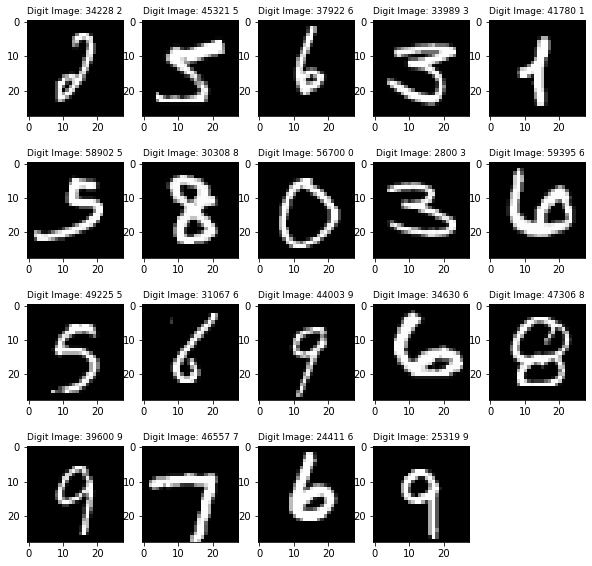

In [15]:
n_image = 19   # number of digit images to plot
image = []
title = []
for i in range(0, n_image):
    r = random.randint(1, digits.shape[0])
    image.append(digits[r])
    title.append('Digit Image: ' + str(r) + " " + str(digLabel[r]))       
    
show(image, title, (n_image + 5 -1) // 5)

In [22]:
digits = np.fromfile('X.bin', dtype=np.single)
digits = digits.reshape(65000, 784)

In [23]:
digits.shape

(65000, 784)

In [28]:
type(digits[0][0])

numpy.float32

In [26]:
np.save ("out", digits)